In [17]:
import spotipy
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [38]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="c0c231a63aff41459ff8db2c552830d2",
                                                           client_secret="ca92f9689fd745219c252148f81f4ac2"))

In [39]:
# GET ALL SHOWS

shows = dict()
vowels = ['a', 'e', 'i', 'o', 'u']

for vowel in vowels:
    offset = 0
    current_iteration = 0
    remaining_iterations = 1
    while ((offset <= 950) and (current_iteration <= remaining_iterations)):
        try: 
            results = sp.search(q=vowel, type='show', market='US', limit=50, offset=offset)
        except:
            continue

        shows_response = results['shows']['items']
        shows_remaining = results['shows']['total']

        for show in shows_response:
            new_show = {
                "id": show['id'],
                "name": show['name'],
                "description": show['description'],
                "languages": show['languages']
            }
            shows[new_show['id']] = new_show

        remaining_iterations = shows_remaining // 50
        current_iteration += 1
        offset += 50

np.save('shows.npy', shows) 

In [40]:
print(len(shows))

4749


In [41]:
# GET ALL EPISODES

episodes = dict()

for show_id in shows.keys():
    try: 
        results = sp.show_episodes(show_id, limit=50, offset=0, market='US')
    except:
        continue

    episode_items = results['items']
    for episode in episode_items:
        
        new_episode = {
            "id": episode['id'],
            "show_id": show_id,
            "name": episode['name'],
            "description": episode['description'],
            "release_date": episode['release_date'],
            "duration_ms": episode['duration_ms'],
            "languages": episode['languages']
        }
        episodes[episode['id']] = new_episode

np.save('episodes.npy', episodes) 

In [42]:
print(len(episodes))

88309


In [3]:
shows = np.load('shows.npy',allow_pickle='TRUE').item()
episodes = np.load('episodes.npy',allow_pickle='TRUE').item()

In [4]:
shows_df = pd.DataFrame(list(shows.values()))
shows_df.head()

id                             name  \
0  6xwxHFRIHhkLbFv0BTIFXI          Anto Aroian Aka AHeat_8   
1  2CNXM2szUcsgFMPpDVhu4i  Annabel Harz: Author and Artist   
2  0416Yv29u3KGUJGzyZUbS3             Anything at anytime    
3  2K8imKKaPNQMZciOF21urm                     Apliques A&A   
4  2iV8RSyfRwV0VI4wwq54Gu            Art and architecture    

                                         description languages  
0     If u have something to say contect me on insta   [en-US]  
1  Promoting personal empowerment through artisti...      [en]  
2  My podcast can be of anything.like now I was f...      [ur]  
3  Mi empresa dedicada a la confección de aplique...      [es]  
4                                                         [en]

In [5]:
episodes_df = pd.DataFrame(list(episodes.values()))
episodes_df.head()

id                 show_id                       name  \
0  2j1pylyyMkEtahd4SNPcVH  6xwxHFRIHhkLbFv0BTIFXI                        IDK   
1  3qU0PanIYQftlMqZgAH9MV  2CNXM2szUcsgFMPpDVhu4i            First Preserves   
2  3VcZo2nOIlM7QIL33Pb3CZ  2CNXM2szUcsgFMPpDVhu4i         Fulfilling a dream   
3  2ssRncNDQvUTwbo9pZH4Ew  0416Yv29u3KGUJGzyZUbS3  Memories of my traveling.   
4  7Gme1mrCZRdYJbOzidRc8x  2K8imKKaPNQMZciOF21urm     Apliques A&A (Trailer)   

                                         description release_date  \
0          Contect me if u have something to say!👍🏻    2018-04-05   
1  This episode is also available as a blog post:...   2021-02-27   
2  This episode is also available as a blog post:...   2021-02-27   
3  In this episode I will discuss the ups and dow...   2021-01-26   
4                                                      2020-08-07   

   duration_ms languages  
0        96758   [en-US]  
1       183414      [en]  
2        60256      [en]  
3      2150655      [ur]  
4        28514      [es]

#### Length of Show and Episode Description Analysis


In [6]:
print("average length of show description: {} words".format(np.mean(shows_df['description'].apply(lambda x: len(x)))))
print("average length of episode description: {} words".format(np.mean(episodes_df['description'].apply(lambda x: len(x)))))

average length of show description: 227.73194356706676 words
average length of episode description: 648.9828669784507 words


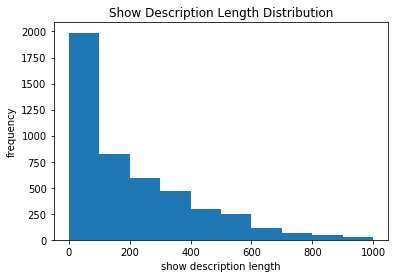

In [7]:
plt.hist(shows_df['description'].apply(lambda x: len(x)), range=(0,1000), bins=10)
plt.xlabel("show description length")
plt.ylabel("frequency")
plt.title('Show Description Length Distribution')
plt.show()

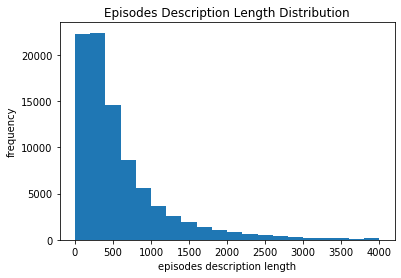

In [8]:
plt.hist(episodes_df['description'].apply(lambda x: len(x)),range=(0,4000),bins=20)
plt.xlabel("episodes description length")
plt.ylabel("frequency")
plt.title('Episodes Description Length Distribution')
plt.show()

#### Episode and Show Description Character Usage Analysis 

In [28]:
import re

show_description_tokens = []
for description in shows_df['description']:
    show_description_tokens+=(re.sub(r'[^a-zA-Z ]+', '', description).split())
show_description_tf = collections.Counter(show_description_tokens)

episode_description_tokens = []
for description in episodes_df['description']:
    episode_description_tokens+=(re.sub(r'[^a-zA-Z ]+', '', description).split())
episode_description_tf = collections.Counter(episode_description_tokens)

In [43]:
print("Top 10 most frequent words and their term frequencies in show description: \n")
for word, score in sorted(show_description_tf.items(),key = lambda x: x[1],reverse=True)[:10]:
    print("'{}', term frequency: {}".format(word,score))

print("\n")
print("Top 10 least frequent words and their term frequencies in show description: \n")
for word, score in sorted(show_description_tf.items(),key = lambda x: x[1])[:10]:
    print("'{}', term frequency: {}".format(word,score))





Top 10 most frequent words and their term frequencies in show description: 

'and', term frequency: 6052
'the', term frequency: 4775
'to', term frequency: 3693
'of', term frequency: 3101
'a', term frequency: 2896
'in', term frequency: 1872
'podcast', term frequency: 1552
'is', term frequency: 1535
'you', term frequency: 1443
'de', term frequency: 1316


Top 10 least frequent words and their term frequencies in show description: 

'contect', term frequency: 1
'insta', term frequency: 1
'anythinglike', term frequency: 1
'confeccin', term frequency: 1
'apliques', term frequency: 1
'personalizados', term frequency: 1
'Abseits', term frequency: 1
'zweite', term frequency: 1
'berhmten', term frequency: 1
'AbseitsArbeitenPodcast', term frequency: 1


In [44]:
print("\n")
print("Top 10 most frequent words and their term frequencies in episode description: \n")
for word, score in sorted(episode_description_tf.items(),key = lambda x: x[1],reverse=True)[:10]:
    print("'{}', term frequency: {}".format(word,score)) 

print("\n")
print("Top 10 least frequent words and their term frequencies in episode description: \n")
for word, score in sorted(episode_description_tf.items(),key = lambda x: x[1])[:10]:
    print("'{}', term frequency: {}".format(word,score)) 



Top 10 most frequent words and their term frequencies in episode description: 

'the', term frequency: 277167
'and', term frequency: 245645
'to', term frequency: 199591
'of', term frequency: 162864
'a', term frequency: 159630
'in', term frequency: 105161
'on', term frequency: 79782
'is', term frequency: 77322
'you', term frequency: 77035
'for', term frequency: 72228


Top 10 least frequent words and their term frequencies in episode description: 

'Contect', term frequency: 1
'httpannabelharzcomfirstpreserves', term frequency: 1
'httpannabelharzcomfulfillingadream', term frequency: 1
'EPR', term frequency: 1
'papierlose', term frequency: 1
'Abseits', term frequency: 1
'httpsanchorfmabseitsarbeitenmessage', term frequency: 1
'alcoolismo', term frequency: 1
'agrotoxicos', term frequency: 1
'desmedida', term frequency: 1


#### Episode Lenght Analysis

In [85]:
print("Mean duration of episodes: {:.2f} milliseconds".format(episodes_df['duration_ms'].mean()))
print("Mean duration of episodes: {:.2f} seconds".format(episodes_df['duration_ms'].mean()/1000))
print("Mean duration of episodes: {:.2f} minutes".format(episodes_df['duration_ms'].mean()/60000))

Mean duration of episodes: 2517096.58 milliseconds
Mean duration of episodes: 2517.10 seconds
Mean duration of episodes: 41.95 minutes


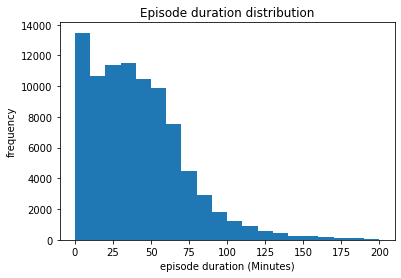

In [94]:
plt.hist(episodes_df['duration_ms']/60000,range=(0,200),bins=20)
plt.xlabel("episode duration (Minutes)")
plt.ylabel("frequency")
plt.title("Episode Duration Distribution")
plt.show()

#### Show Language Distribution 

In [113]:
print("Top 20 most used languages in the shows")
display(shows_df['languages'].apply(lambda x: x[0]).value_counts()[:20])

Top 20 most used languages in the shows


en       2594
es        551
pt        363
en-US     283
id        199
de        138
pt-BR      51
it         46
hi         45
fr         44
nl         34
es-MX      27
sv         27
tr         21
pl         16
da         16
en-GB      15
sq         14
de-DE      12
no         12
Name: languages, dtype: int64

#### Shows and Episodes Analysis 

In [152]:
print("10 shows with the most episodes: \n")
show_episode_df = episodes_df.merge(shows_df, left_on="show_id",right_on="id")
for i,show in enumerate(show_episode_df.groupby('name_y').count()['id_x'].sort_values(ascending=False)[0:10].index):
    print("{}) {}".format(i+1, show)) 

10 shows with the most episodes: 

1) The Option Alpha Podcast
2) NBA TopShot Insider
3) Made In Mississippi
4) Made It In Music: Interviews With Artists, Songwriters, And Music Industry Pros
5) Magic on The Inside
6) Maher Al Mueaqly
7) Make It Rain: Multifamily Real Estate Investing for Millennials
8) Bossed Up
9) Make it Stop: A Bad Music Podcast
10) Borgen unplugged
